In [1]:
from google.colab import drive

# mount your Google Drive
drive.mount("/content/gdrive") 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
%tensorflow_version 1.x
import tensorflow as tf
#tf.enable_eager_execution()
import keras.models
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from keras.losses import categorical_crossentropy

import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

from sklearn.model_selection import train_test_split

TensorFlow 1.x selected.


Using TensorFlow backend.


In [4]:
# seed for reproducibility
SEED = 44000


# lists to store data
data = []
label = []

# folder where data is placed
BASE_FOLDER = '/content/gdrive/My Drive/KDEF database ALL'

folders = os.listdir(BASE_FOLDER)
im_shape = (225,225)
x = 1
# loading data to lists
#did better when eliminating afraid
for folder in folders:
    for file in os.listdir(BASE_FOLDER +'/'+ folder + '/'):
        if folder == "angry - AN"  or folder=="sad - SA" or folder=="surprised - SU":
          pass
        else:
          img = cv2.imread(BASE_FOLDER + '/'+ folder + '/' + file, cv2.IMREAD_GRAYSCALE)
        #print(file)
          dim = img.shape
          #print(dim)
       
        # do any pre-processing if needed like resize, sharpen etc.
          img = cv2.resize(img, dsize=im_shape) #resize
        #cv2_imshow(img)

          img = np.array(img)
          img = img.reshape(225, 225, 1)
          img = img / 255.0

          data.append(img)
          label.append(folder)
          #if x%1000 == 0 or x == 4900:
           # print(x)
          x += 1
print("Done! With ", x, "images")


Done! With  2803 images


In [5]:
# now split the data in to train and test with the help of train_test_split

labels = []
for x in label:
  #print(x)
  if x == 'afraid - AF':
    labels.append(1)
  #if x == 'angry - AN':
  #  labels.append(1)
  elif x == 'disgust - DI':
    labels.append(2)
  elif x == 'happy - HA':
    labels.append(3)
  #elif x == 'sad - SA':
    #labels.append(4)
  #elif x == 'surprised - SU':
   # labels.append(4)
  elif x == 'neutral - NE':
    labels.append(4)

print(labels.count(1))
print(labels.count(2))
print(labels.count(3))
print(labels.count(4))

#print(labels)

data_arr = np.array(data)
labels_arr = np.array(labels)
#print(len(data_arr))
#print(len(labels_arr))

703
703
700
696


In [0]:
from keras.utils.np_utils import to_categorical   
 # one hot encode the labels (tensorflow requirement)
categorical_labels = to_categorical(labels_arr, num_classes=5, dtype='int')
print(categorical_labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [0]:
train_data, test_data, train_label, test_label = train_test_split(data_arr, categorical_labels, test_size=0.3, random_state=SEED) #split data into test and train set
test_data, valX, test_label, valY = train_test_split(test_data, test_label, test_size=0.5, random_state=42, shuffle=False) #create validation set from test set

In [0]:
train_data.shape
train_label.shape
valX.shape
valY.shape

(421, 5)

In [0]:
def create_model():

  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(225, 225, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.1)) 
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(256, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dropout(0.1)) 
  model.add(Dense(5, activation='softmax'))

  #model.summary()
  
  return model


In [0]:
model = create_model() # create the model 

# compile it with the loss the optimizer and the accuracy metric
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999), metrics=['accuracy']) 

# fit the training data into the neural network, use the validation data for validation during training for 45 epochs 
history = model.fit(train_data, train_label, batch_size=45, epochs=25, verbose=1, validation_data=(valX, valY), shuffle=True)

Train on 1961 samples, validate on 421 samples
Epoch 1/25
1961/1961 [==============================] - 3s 2ms/step - loss: 1.4306 - acc: 0.2749 - val_loss: 1.3900 - val_acc: 0.3040
Epoch 2/25
1961/1961 [==============================] - 3s 1ms/step - loss: 1.2969 - acc: 0.3779 - val_loss: 1.2832 - val_acc: 0.4133
Epoch 3/25
1961/1961 [==============================] - 3s 1ms/step - loss: 0.9816 - acc: 0.5767 - val_loss: 0.9389 - val_acc: 0.6176
Epoch 4/25
1961/1961 [==============================] - 3s 1ms/step - loss: 0.6630 - acc: 0.7517 - val_loss: 0.7945 - val_acc: 0.6698
Epoch 5/25
1961/1961 [==============================] - 3s 1ms/step - loss: 0.4319 - acc: 0.8363 - val_loss: 0.5591 - val_acc: 0.7767
Epoch 6/25
1961/1961 [==============================] - 3s 1ms/step - loss: 0.3478 - acc: 0.8730 - val_loss: 0.5134 - val_acc: 0.8124
Epoch 7/25
1961/1961 [==============================] - 3s 1ms/step - loss: 0.1934 - acc: 0.9312 - val_loss: 0.4071 - val_acc: 0.8504
Epoch 8/25
1961

In [0]:
evaluation = model.evaluate(test_data, test_label, batch_size=)
print("Test loss: ", evaluation[0])
print("Test accuracy: ", evaluation[1])


420/420 [==============================] - 0s 657us/step
Test loss:  0.3839410588565876
Test accuracy:  0.9238095238095239


In [0]:
#save current model
model.save_weights("myModel.h5") #saved at 59% with all

In [0]:
#Confusion Matrix


preds = model.predict(test_data)
p = tf.keras.metrics.Precision()
p.update_state(test_label, preds)
#print('Final result Precision: ', p.result())  # Final result: 0.66
r = tf.keras.metrics.Recall()
r.update_state(test_label, preds)
#print('Final result Recall: ', r.result())  # Final result: 0.66

<tf.Operation 'group_deps_13' type=NoOp>

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

y_pred = []
y_true = []
for each in preds: 
    y_pred.append(np.argmax(each)) # get the right predictions outcome

for each in test_label: 
    y_true.append(np.argmax(each)) # get the label from the one hot encoded labels

#print(y_pred)
#print(y_true)

In [0]:
cm = confusion_matrix(y_true, y_pred) # create the confusion matrix
print(cm) # print the confusion matrix
print('Accuracy Score :', accuracy_score(y_true, y_pred))
print('Report : ')
print(classification_report(y_true, y_pred)) 

[[ 81   6   4   4]
 [ 13  82   8   1]
 [  2   3 111   0]
 [ 27   1   3  74]]
Accuracy Score : 0.8285714285714286
Report : 
              precision    recall  f1-score   support

           1       0.66      0.85      0.74        95
           2       0.89      0.79      0.84       104
           3       0.88      0.96      0.92       116
           4       0.94      0.70      0.80       105

    accuracy                           0.83       420
   macro avg       0.84      0.83      0.83       420
weighted avg       0.85      0.83      0.83       420



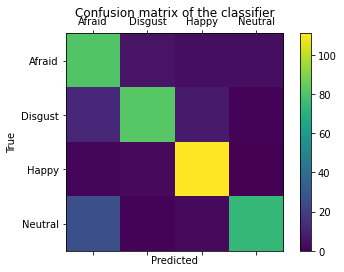

In [0]:
#create a heatmap for the confusion matrix

import matplotlib.pyplot as plt
%matplotlib inline

labels=['Afraid', 'Disgust', 'Happy', 'Neutral']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()